In [13]:
import random
import cv2
import sys
import numpy as np
from scipy import ndimage as ndimage
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec



In [14]:
arr = np.array([[255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255]])

In [15]:
gauss = np.array([[1, 2, 1],
                  [2, 4, 2],
                  [1, 2, 1]])

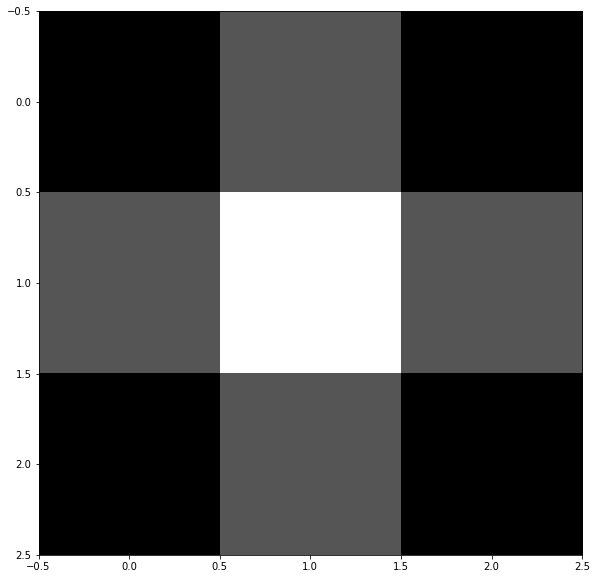

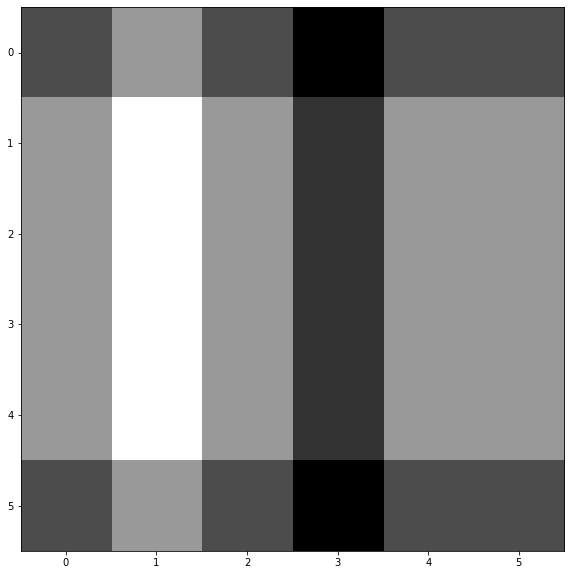

In [21]:
plt.figure(figsize = (10,10))
plt.imshow(gauss, cmap='gray')
plt.show()

img_filtered = ndimage.filters.convolve(arr, gauss, mode='constant')
plt.figure(figsize = (10,10))
plt.imshow(img_filtered, cmap='gray')
plt.show()

In [ ]:
dft = cv2.dft(np.float32(gauss), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
sample_angles = np.linspace(0,  2 * np.pi, len(magnitude_spectrum.sum(axis=0))) / np.pi*180

fig, axs = plt.subplots(1, sharex=True, sharey=True)
plt.figure(figsize = (10,10))
axs.plot(sample_angles, magnitude_spectrum.sum(axis=0))
plt.show()

In [ ]:
img_filtered

In [ ]:
import numpy as np
import cv2

info = np.iinfo(img_filtered.dtype) # Get the information of the incoming image type
img_filtered = img_filtered.astype(np.float64) / info.max # normalize the data to 0 - 1
img_filtered = 255 * img_filtered # Now scale by 255
img = img_filtered.astype(np.uint8)


plt.figure(figsize = (10,10))
plt.imshow(img, cmap='gray')
plt.show()

In [12]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

In [17]:
imgu8 = convert(img_filtered, 0, 255, np.uint8)

In [18]:
imgu8

array([[ 76, 153,  76,   0,  76,  76],
       [153, 255, 153,  51, 153, 153],
       [153, 255, 153,  51, 153, 153],
       [153, 255, 153,  51, 153, 153],
       [153, 255, 153,  51, 153, 153],
       [ 76, 153,  76,   0,  76,  76]], dtype=uint8)

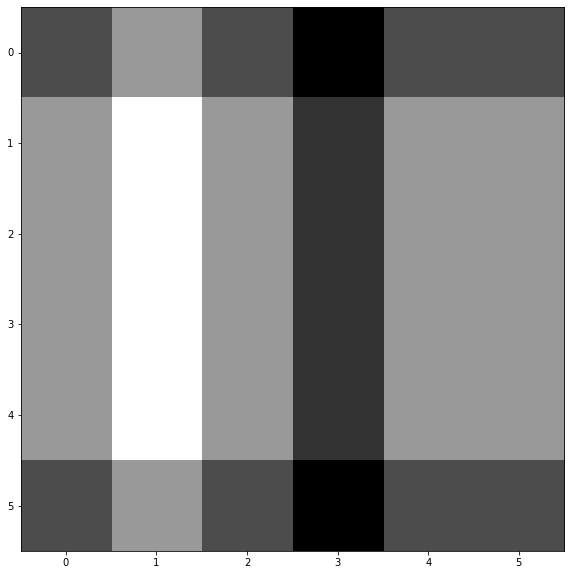

In [19]:
plt.figure(figsize = (10,10))
plt.imshow(imgu8, cmap='gray')
plt.show()

In [20]:
imgu8.max()

255